In [1]:
import numpy as np

In [10]:
X = 2 * np.random.rand(100, 1)
y = 3 + 6 * X + np.random.randn(100, 1)

### Normal Equation

In [11]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[2.87135586],
       [6.20260015]])

In [ ]:
np.ones((100,1))

In [ ]:
X_b

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.0864481],
       [10.0777447]])

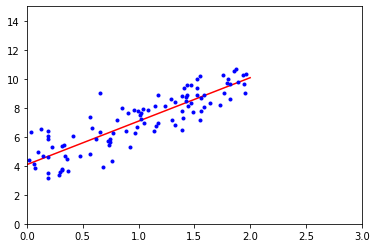

In [9]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,3,0,15])
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lin_reg.intercept_, lin_reg.coef_

(array([2.87135586]), array([[6.20260015]]))

###  SVD is used by Sklearn, inner logic

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[2.87135586],
       [6.20260015]])

In [16]:
# Singular Value Decomposition (SVD)

np.linalg.pinv(X_b).dot(y)

array([[2.87135586],
       [6.20260015]])

In [17]:
np.linalg.svd(np.linalg.pinv(X_b).dot(y))

(array([[ 0.42009727, -0.90747908],
        [ 0.90747908,  0.42009727]]), array([6.83497865]), array([[1.]]))

### Gradient Descent

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#### Batch GD

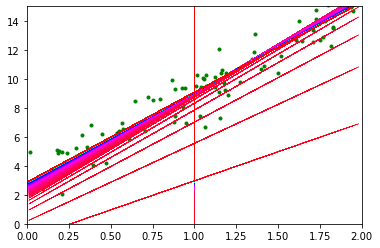

In [19]:
eta = 0.1 # LR
n_iter = 1000
m = 100

theta = np.random.randn(2, 1)

plt.plot(X, y, "g.")

for iteration in range(n_iter):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

  y_predict = X_b.dot(theta)
  plt.plot(X_b, y_predict, c = cm.hsv_r(iteration), linewidth = 0.5)

plt.axis([0, 2, 0, 15])
plt.show()

In [20]:
theta

array([[2.87135586],
       [6.20260015]])

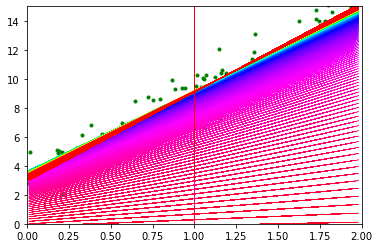

In [21]:
eta = 0.01 # LR
n_iter = 1000
m = 100

theta = np.random.randn(2, 1)

plt.plot(X, y, "g.")

for iteration in range(n_iter):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

  y_predict = X_b.dot(theta)
  plt.plot(X_b, y_predict, c = cm.hsv_r(iteration), linewidth = 0.5)

plt.axis([0, 2, 0, 15])
plt.show()

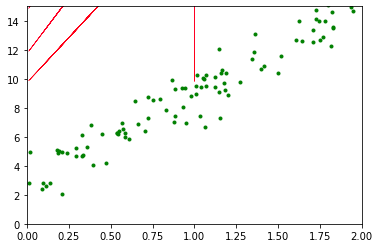

In [25]:
eta = 0.5 # LR
n_iter = 1000
m = 100

theta = np.random.randn(2, 1)

plt.plot(X, y, "g.")

for iteration in range(n_iter):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

  y_predict = X_b.dot(theta)
  plt.plot(X_b, y_predict, c = cm.hsv_r(iteration), linewidth = 0.5)

plt.axis([0, 2, 0, 15])
plt.show()

In [26]:
theta

array([[-1.78051140e+70],
       [-2.08732138e+70]])

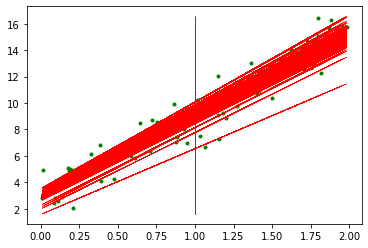

In [27]:
n_epochs = 50
m = 100
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)
plt.plot(X, y, "g.")

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)

    xi = X_b[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]

    gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

    y_predict = X_b.dot(theta)
    plt.plot(X_b, y_predict, c=cm.hsv_r(iteration), linewidth = 0.5)

plt.show()

In [28]:
theta

array([[2.86558998],
       [6.23141276]])

In [29]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [30]:
sgd_reg.intercept_, sgd_reg.coef_

(array([2.86742354]), array([6.20812836]))